## Section 0: Getting Started with Plotly

Welcome to Plotly's Python API User Guide. 

> Links to the other sections are on the User Guide's [homepage](https://plotly.com/python/userguide) 

Section 0 is divided as follows:

* [0.1 The Plotly philosophy](#0.1-The-Plotly-Philosophy)

* [0.2 Set up Plotly to start making plots](#0.2-Set-up-Plotly-to-start-making-plots)

* [0.3 A first Plotly plot](#0.3-A-first-Plotly-plot)

* [0.4 Plotly's graph objects](#0.4-Plotly's-graph-objects)

* [0.5 Graph object methods](#0.5-Graph-object-methods)

* [0.6 Get figure and new possible workflows](#0.6-Get-figure-and-new-possible-workflows)

<hr>

### 0.1 The Plotly Philosophy

Python gives users access to easy-to-use, serializible data structures, namely lists and dictionaries. 

Plotly let's you use what you already know about handling these data structures to make beautiful visualizations of your data. The underlying each figure you make in Plotly is nothing more than an organized, nested dictionary.

> Working with Plotly's Python API sums up to working with Python lists and dictionaries.

If you are new to Python or in need of a brush up, we recommand looking over the User Guide's [Appendix A](https://plotly.com/python/python-tutorial), where we present valuable information about the Python features most used in the User Guide.

### 0.2 Set up Plotly to start making plots

The User Guide's <a href="https://plotly.com/python/user-guide#Installation-guidelines" target="_blank">homepage</a> walks you through the Plotly installation/sign up process. 

**We recommend staying up-to-date with the latest version of the Plotly Python package.**

To check which Plotly version is currently installed on your machine, run (inside Python or IPython):

In [1]:
# (*) Import plotly package
import plotly

# Check plotly package version
plotly.__version__ 

'1.9.5'

In order to ensure you have the latest version, type the following in a terminal:

  * `$ pip install plotly --upgrade`
  
If you have issues upgrading and installing Plotly, feel free to post in our [Community Forum](http://community.plot.ly/). 
  
The content of the Plotly Python package is split into three main modules:

* `plotly.plotly` 
* `plotly.tools`
* `plotly.graph_objs`

Loosley speaking, the `plotly.plotly` module contains functions that require a response from Plotly's servers. Functions in this module are the liaison between your local machine and Plotly. 

The `plotly.tools` module is a set of helpful (new) functions facilitating and enhancing the Plotly experience. Functions for subplot generation, embedding Plotly plots in IPython notebooks, saving and retrieving your credentials are now at your finger tips.

And finally, the `plotly.graph_objs` module contains all of the class definitions for the objects that make up the plots you see. These *graph objects* are for instance: Figure, Data, Layout, Scatter,  etc. Graph objects are dictionary- and list-like objects used to generate and/or modify every feature of a Plotly plot. Graph objects are covered in details in [subsection 0.4](#0.4-Plotly's-graph-objects).

But for now, let's sign in to Plotly and get ready to make a simple first plot:

In [2]:
# (*) How you communicate with Plotly's servers
import plotly.plotly as py       

> Once you have set up your [credentials file](https://plotly.com/python/getting-started/), the above line of code is all you need to sign in to Plotly's servers. 

*That's right, you are now signed in!*

How does that work? While being imported, the `plotly.plotly` module looks for your credentials file on your machine and automatically uses it to sign in to Plotly's servers.

Using the credentials file allows users to share code without having to type in (let alone remember) their own username and API key every time they want to generate a new Plotly plot, or modify an existing Plotly plot.

That said, if more convenient, users can still manually sign in to Plotly by typing:

    >>> py.sign_in('your_username','your_api_key')


Next, to enhance our Plotly plotting experience, we import the `plotly.tools` module:

In [3]:
# (*) Useful tools, e.g., get_sublots(), embed()
import plotly.tools as tls

The `py` and `tls` are the recommended references for the `plotly.plotly` and `plotly.tools` modules respectively. They are used throughout the User Guide.

### 0.3 A first Plotly plot

For our first plot, let's take two lists of numbers and plot them against each other. 
In later sections, we will use real data files, but for now, this will do.

Plot data and style options are sent to Plotly through the first argument of the `plot()` function of the `plotly.plotly` module.

That's right, data AND style options make up only one argument in Plotly, and they're both packaged in one Python dictionary.
More specifically, this `plot()` function anticipates one and only one *figure object* (more in [subsection 0.4](#0.4-Plotly's-graph-objects)).
 
Consider the following code:

In [2]:
# (1) Two lists of numbers
x1 = [1, 2, 3, 5, 6]
y1 = [1, 4.5, 7, 24, 38]

# (2) Make dictionary linking x and y coordinate lists to 'x' and 'y' keys
trace1 = dict(x=x1, y=y1)

# (3) Make list of 1 trace, to be sent to Plotly
data = [trace1]

In [5]:
# (@) Call the plot() function of the plotly.plotly submodule,
#     save figure as 's0_first_plot'
py.plot(data, filename='s0_first_plot')

u'https://plotly.com/~etpinard/157'

Good.

We need to mention that, by default, the `plot()` function prints the unique URL that identifies the figure on the stdout and opens a new tab in your browser showing the plot just generated on the Plotly website.

Here's a snapshot:

<img src="http://i.imgur.com/w19Bs3B.png" />

<br>

If you don't like having Plotly open a new tab every time you make a plot, you can turn this feature off simply by adding one keyword argument to `plot()`:

In [6]:
# (@) Make Plotly plot but do no open a new tab
py.plot(data, filename='s0_first_plot', auto_open=False)

u'https://plotly.com/~etpinard/157'

The keyword argument `filename` is used to name our Plotly plot. Here, the generated figure is saved in your own Plotly directory as `s0_first_plot`. 

By default, this figure is accessible for all. If you want to keep your plots private, add the following keyword argument in the `plot()` call:

    `sharing = private` OR `sharing = secret` 
    
But careful! Users with a free account have a limiting number of private figures that they can save on the Plotly servers. For more info, see our <a href="https://plotly.com/plans" target="_blank">plans and pricing</a>.

For IPython notebook users (like us here in the User Guide), Plotly makes it easy to incorporate Plotly plots inside IPython notebooks. By calling the `iplot()` function instead of the `plot()`, Plotly embeds the generated plot directly in the cell, similar to the IPython `%matplotlib inline` magic:

In [7]:
# (@) Sent data to Plotly and show result in notebook 
py.iplot(data, filename='s0_first_plot')

Fantastic and convenient, the `iplot()` function is used throughout the User Guide.

Plotly plots are fully interactive (even inside IPython notebooks):

* Users can check the x and y coordinates of every point on the plot by hovering with the cursor. 
* By scrolling or clicking and dragging the cursor over a region, Plotly zooms in on the plot and resizes lines, points and axes (not just a static zoom, try it!). 
* Hold the shift key while clicking and dragging to pan.
* Finally, a double click on the plot zooms back out to the original version. 

In brief, Plotly is a great way to make beautiful interactive plots in a clean and simple manner. It turns lists of numbers into plots very easily. That said, for custom and professional-looking plots (with titles among other things), we need to learn how to use Plotly in conjunction with Python lists, dictionaries and their decendent, Plotly graph objects.

### 0.4 Plotly's graph objects

<h4>Question:</h4> 
What are these Plotly graph objects?

<h4>Answer 1:</h4> 
Plotly graph objects are Python dictionaries and lists.

<h4>Answer 2:</h4> 
More precisely, Plotly's Graph Objects inherit from Python's native dictionary and list data structures. Thus, by defining the Plotly graph objects as new classes, users can have access to class-specific help, validation, and functionality. 

<h4>Answer 3:</h4> 
And for the really technical among us, each Plotly graph object is represented by a sub-dictionary in a JSON structure that stores every bit of information of a Plotly plot that is rendered by your browser. 

> All bits of information of a Plotly plot are stored in a figure object. Specifically, the `Figure` object is the first required argument for the `plot()` and `iplot()` functions.

A `Figure` object contains in turn one `Data` graph object and one `Layout` graph object:

* `Data` stores data and style options associated with traces.

 As a convention, we use the term *trace* to refer to any collection of data points meant to be plotted as a whole. For example in our first plot, the `x1`, `y1` lists represent one trace.

* `Layout` stores information associated with the axes, legend, annotations and other *aesthetic* features outside the plotting area.

For example, setting the line color is made via `Data` while setting the title of the plot is made via `Layout`.

Plotly's Python API helps you create these objects by now offering up tons of help documentation, doing validation for you and offering tools to make the manipulation of these structures simpler.

So, let's start playing around with graph objects by importing `Data`, `Layout` and `Figure` from the `plotly.graph_objs` module:

In [8]:
# (*) Graph objects to piece together plots
from plotly.graph_objs import Data, Layout, Figure

Admire the extensive help documentation:

In [9]:
help(Figure)  # call help()!

Help on class Figure in module plotly.graph_objs.graph_objs:

class Figure(PlotlyDict)
 |  A dictionary-like object representing a figure to be rendered by plotly.
 |      This is the container for all things to be rendered in a figure.
 |  
 |  Quick method reference:
 |  
 |      Figure.update(changes)
 |      Figure.strip_style()
 |      Figure.get_data()
 |      Figure.to_graph_objs()
 |      Figure.validate()
 |      Figure.to_string()
 |      Figure.force_clean()
 |  
 |  Valid keys:
 |  
 |      data [required=False] (value=Data object | list-like object of one or
 |      several dictionary-like object):
 |          A list-like object of one or multiple trace dictionary-like objects
 |          to be shown on one plotly figure.
 |  
 |          For more, run `help(plotly.graph_objs.Data)`
 |  
 |      layout [required=False] (value=Layout object | dictionary-like object):
 |          A dictionary-like object that contains the layout parameters (e.g.
 |          information about

In [10]:
help(Data)  # call help()!

Help on class Data in module plotly.graph_objs.graph_objs:

class Data(PlotlyList)
 |  A list-like object of trace dictionary-like objects to be shown on one
 |      plotly figure.
 |  
 |  Example:
 |  
 |      >>> Data([Bar(x=[1,2], y=[4,5]), Scatter(x=[1,2], y[2,3])])
 |  
 |  Parent key:
 |  
 |      data
 |  
 |  Quick method reference:
 |  
 |      Data.update(changes)
 |      Data.strip_style()
 |      Data.get_data()
 |      Data.to_graph_objs()
 |      Data.validate()
 |      Data.to_string()
 |      Data.force_clean()
 |  
 |  Method resolution order:
 |      Data
 |      PlotlyList
 |      __builtin__.list
 |      __builtin__.object
 |  
 |  Methods defined here:
 |  
 |  to_graph_objs(self, caller=True)
 |      Change any nested collections to subclasses of PlotlyDict/List.
 |      
 |      Procedure:
 |          1. Attempt to convert all entries to a subclass of PlotlyTrace.
 |          2. Call `to_graph_objects` on each of these entries.
 |  
 |  -------------------------

In [11]:
help(Layout)  # call help()!

Help on class Layout in module plotly.graph_objs.graph_objs:

class Layout(PlotlyDict)
 |  A dictionary-like object containing specification of the layout of a plotly
 |      figure.
 |  
 |  Online examples:
 |  
 |      https://plotly.com/python/figure-labels/
 |      https://plotly.com/python/axes/
 |      https://plotly.com/python/bar-charts/
 |      https://plotly.com/python/log-plot/
 |  
 |  Parent key:
 |  
 |      layout
 |  
 |  Quick method reference:
 |  
 |      Layout.update(changes)
 |      Layout.strip_style()
 |      Layout.get_data()
 |      Layout.to_graph_objs()
 |      Layout.validate()
 |      Layout.to_string()
 |      Layout.force_clean()
 |  
 |  Valid keys:
 |  
 |      title [required=False] (value=a string):
 |          The title of the figure.
 |  
 |      titlefont [required=False] (value=Font object | dictionary-like object):
 |          Links a dictionary-like object describing the font settings of the
 |          figure's title.
 |  
 |          For mor

Notice that `Data` is a list-like object whereas `Figure` and `Layout` are dictionary-like objects. Ordering is important in `Data` as individual traces are plotted in order starting from the first trace graph object in `Data`. For example, a scatter trace plotted over a bar trace does not yield, in general, the same plot as a bar trace plotted over a scatter trace.

Speaking of traces, every Plotly plot type has its own graph object (or more specifically its own *trace graph object*) e.g. `Scatter`, `Bar`, `Histogram`. As a first example, let's try to improve on our first plot by incorporating the graph object `Scatter`:

In [12]:
# (*) Import the Scatter graph object
from plotly.graph_objs import Scatter

In [13]:
help(Scatter)  # call help()!

Help on class Scatter in module plotly.graph_objs.graph_objs:

class Scatter(PlotlyTrace)
 |  A dictionary-like object for representing a scatter trace in plotly.
 |  
 |  Example:
 |  
 |      >>> py.plot([Scatter(name='tacters', x=[1,4,2,3], y=[1,6,2,1])])
 |  
 |  Online examples:
 |  
 |      https://plotly.com/python/line-and-scatter/
 |      https://plotly.com/python/bubble-charts/
 |      https://plotly.com/python/filled-area-plots/
 |      https://plotly.com/python/time-series/
 |  
 |  Quick method reference:
 |  
 |      Scatter.update(changes)
 |      Scatter.strip_style()
 |      Scatter.get_data()
 |      Scatter.to_graph_objs()
 |      Scatter.validate()
 |      Scatter.to_string()
 |      Scatter.force_clean()
 |  
 |  Valid keys:
 |  
 |      x [required= when 'y','r' and 't' are unset] (value=list or 1d numpy
 |      array of numbers, strings, datetimes) (streamable):
 |          Sets the x coordinates of the points of this scatter trace. If 'x'
 |          is linked t

Consider the following code:

In [14]:
# Make three lists of numbers
x = [1, 2, 3, 5, 6]
y1 = [1, 4.5, 7, 24, 38]
y2 = [1, 4, 9, 25, 36]

# (1.1) Make a 1st Scatter object
trace1 = Scatter(
    x=x,           # x-coordinates of trace
    y=y1,          # y-coordinates of trace
    mode='markers'   # scatter mode (more in UG section 1)
)

# (1.2) Make a 2nd Scatter object
trace2 = Scatter(
    x=x,           # same x-coordinates
    y=y2,          # different y-coordinates
    mode='lines'     # different scatter mode
) 

# (2) Make Data object 
data = Data([trace1, trace2])  # (!) Data is list-like, must use [ ]

# (3) Make Layout object (Layout is dict-like)
layout = Layout(title='Fig 0.3: Some Experiment')

# (4) Make Figure object (Figure is dict-like)
fig = Figure(data=data, layout=layout) 

Note that the statement

    trace1 = Scatter(
        x=x
    )
    
where `x=x` means link the content of variable `x`, already defined in working namespce, to the key `'x'` in `Scatter`. This syntax inherits from Python's `dict()` constructor. For more info see <a href="https://plotly.com/python/python-tutorial#A.3-Dictionaries" target="_blank">Appendix A</a>.

And similarly, 

    fig = Figure(data=data, layout=layout)
    
means link the content of variables `data` and `layout` to keys `'data'` and `'layout'` in `Figure`.

This notation is used throughout the User Guide and Plotly's online <a href="https://plotly.com/python/" target="_blank">documentation</a>.

In [15]:
print(fig)  # print the figure object in notebook

{'layout': {'title': 'Fig 0.3: Some Experiment'}, 'data': [{'y': [1, 4.5, 7, 24, 38], 'x': [1, 2, 3, 5, 6], 'type': u'scatter', 'mode': 'markers'}, {'y': [1, 4, 9, 25, 36], 'x': [1, 2, 3, 5, 6], 'type': u'scatter', 'mode': 'lines'}]}


Figure objects store data just like a Python dictionary. For instance, the `'layout'` has for value a dictionary and the `'data'` key has for value a list of dictionaries. These dictionaries store data and style options of each trace to be plotted. 

All Plotly graph objects are equipped with the `.to_string()` *graph object method* which yields a human-friendly string representation of any graph object. For example,

In [16]:
print(fig.to_string())  # print figure object in human-friendly form

Figure(
    data=Data([
        Scatter(
            x=[1, 2, 3, 5, 6],
            y=[1, 4.5, 7, 24, 38],
            mode='markers'
        ),
        Scatter(
            x=[1, 2, 3, 5, 6],
            y=[1, 4, 9, 25, 36],
            mode='lines'
        )
    ]),
    layout=Layout(
        title='Fig 0.3: Some Experiment'
    )
)


Using `.to_string()`, we can conveniently identify individual graph objects that make up the figure object. *Nice.*

Now, we send the figure object to Plotly, give our Plotly plot a file name and get it in return directly in this IPython notebook:

In [17]:
# (@) Send Figure object to Plotly and show plot in notebook
py.iplot(fig, filename='s0_second-plot') 

Not bad.

But your high school science teacher would not entirely be proud of you, the axes are not labelled.

To do so, we again turn to Plotly graph objects. For the task at hand, the relevant graph objects are `XAxis` and `YAxis`:

In [18]:
# (*) Import graph objects XAxis and YAxis
from plotly.graph_objs import XAxis, YAxis

In [19]:
help(XAxis)  # call help()!

Help on class XAxis in module plotly.graph_objs.graph_objs:

class XAxis(PlotlyDict)
 |  A dictionary-like object for representing an x-axis in plotly.
 |  
 |  Online examples:
 |  
 |      https://plotly.com/python/axes/
 |      https://plotly.com/python/multiple-axes/
 |      https://plotly.com/python/subplots/
 |      https://plotly.com/python/insets/
 |  
 |  Parent key:
 |  
 |      xaxis
 |  
 |  Quick method reference:
 |  
 |      XAxis.update(changes)
 |      XAxis.strip_style()
 |      XAxis.get_data()
 |      XAxis.to_graph_objs()
 |      XAxis.validate()
 |      XAxis.to_string()
 |      XAxis.force_clean()
 |  
 |  Valid keys:
 |  
 |      title [required=False] (value=a string):
 |          The x-axis title.
 |  
 |      titlefont [required=False] (value=Font object | dictionary-like object):
 |          Links a dictionary-like object describing the font settings of the
 |          x-axis title.
 |  
 |          For more, run `help(plotly.graph_objs.Font)`
 |  
 |      r

Now, consider the following:

In [20]:
# (6.1) Make XAxis object, add title key
xaxis = XAxis(title='Some independent variable')

# (6.2) Make YAxis object, add title key
yaxis = YAxis(title='Some dependent variable')

# (7) Update 'layout' key in the Figure object
fig['layout'].update(
    xaxis1=xaxis,  # link XAxis object to 'xaxis1' (corresp. to first/only x-axis)
    yaxis1=yaxis   # similarly for 'yaxis1'
)

In [21]:
print(fig.to_string()) # print figure object to stdout

Figure(
    data=Data([
        Scatter(
            x=[1, 2, 3, 5, 6],
            y=[1, 4.5, 7, 24, 38],
            mode='markers'
        ),
        Scatter(
            x=[1, 2, 3, 5, 6],
            y=[1, 4, 9, 25, 36],
            mode='lines'
        )
    ]),
    layout=Layout(
        title='Fig 0.3: Some Experiment',
        xaxis1=XAxis(
            title='Some independent variable'
        ),
        yaxis1=YAxis(
            title='Some dependent variable'
        )
    )
)


Graph objects can be *updated* using the `update()` method (similar to the `update()` method for Python dictionaries), meaning that adding or updating features to a Plotly plot does not require whole redefinitions (more in [subsection 0.5](#0.5-Graph-object-methods)).

A call to Plotly gets us:

In [22]:
# (@) Send Figure object to Plotly and show plot in notebook
py.iplot(fig, filename='s0_second-plot-axis-titles') 

Great!

Adding or customizing other features such as the legend or annotations is just as easy.

All Plotly graph objects are associated with an intuitively-named class (using the CamelCase conventions). Moreover, extensive documentation makes running `help()`, helpful.

In this section, graph objects imports are made using the

    >>> from plotly.graph_objs import GraphObj1, GraphObj2, ...
    
form. Although, something like

    >>> import plotly.graph_objs as go

works too. 

That said, in other sections of the User Guide, Plotly graph objects will be imported all at once using:

    >>>  from plotly.graph_objs import * 

for simplicity.

Users should note that this mass import form *could* but *should not* come in conflict with other Python libraries.

For a complete list of the graph objects available (hence the names that are populated during the mass import) in the current version of the Plolty package, go to our reference page at <a href="https://plotly.com/python/reference/">plot.ly/python/reference</a>.

### 0.5 Graph object methods

OK. Now that you know what graph objects are, beginner Plotly users might be saying:

> Hold on! Plotly graphs objects have the same structure as native Python dictionaries and lists. So why did Plotly add this layer of abstraction in its Python package?

Well, along with the graph objects' extensive documentation and their `to_string()` method that we saw in the previous subsection, graph objects support:

* Key validation 
* Nested dictionary updates

on top of Python dictionary and list features. These features will be presented below in this subsection.

That said, please note:

> If the Plotly graph objects are too abstract for you, Plotly works perfectly with native Python `dict` and `list`.

##### Key validation

Consider the following example:

In [23]:
# (!) Import Bar graph object
from plotly.graph_objs import Bar

# Starting with a simple bar object
trace1 = Bar(
    x=[1, 2, 3],
    y=[2, 1, 1]
)

Say you want to change to fill color of the bars to red. Intuitively, you may think that the `'fillcolor'` attributes would do just that. So, you try:

In [24]:
trace1['fillcolor'] = 'red'

But, then using `validate()`, we get:

In [25]:
try:
    trace1.validate()                        # check if valid!
except Exception as validate_error_message:
    print validate_error_message             # print error message
    
# (-) Without the try/except block trace1.validatae() 
#     would halt the excution of the code

Invalid key, 'fillcolor', for class, 'Bar'.

Run 'help(plotly.graph_objs.Bar)' for more information.

Path To Error:
['fillcolor']

Additional Notes:
That key is valid only in these objects:

	Scatter('fillcolor'="a string describing color")
	Box('fillcolor'="a string describing color")



Hmm, we got an error: `'fillcolor'` is not a valid attribute in Bar.

> The `validate()` method allows users to validate graph object keys within an Python / IPython session without having to resort to documentation.

Futhermore, using `help()`:

In [26]:
help(Bar)  # call help()!

Help on class Bar in module plotly.graph_objs.graph_objs:

class Bar(PlotlyTrace)
 |  A dictionary-like object for representing a bar trace in plotly.
 |  
 |  Example:
 |  
 |      >>> py.plot([Bar(x=['yesterday', 'today', 'tomorrow'], y=[5, 4, 10])])
 |  
 |  Online example:
 |  
 |      https://plotly.com/python/bar-charts/
 |  
 |  Quick method reference:
 |  
 |      Bar.update(changes)
 |      Bar.strip_style()
 |      Bar.get_data()
 |      Bar.to_graph_objs()
 |      Bar.validate()
 |      Bar.to_string()
 |      Bar.force_clean()
 |  
 |  Valid keys:
 |  
 |      x [required= when 'y' is unset] (value=list or 1d numpy array of
 |      numbers, strings, datetimes) (streamable):
 |          Sets the x coordinates of the bars. If 'x' is linked to a list or 1d
 |          numpy array of strings, then the x coordinates are integers, 0, 1,
 |          2, 3, ..., labeled on the x-axis by the list or 1d numpy array of
 |          strings linked to 'x'. If 'y' is not set, the bars are 

We notice that in this case, 

    >>> trace1['marker'] = Marker(color='red')
    
would yield the require result.

The plotting functions `plot()` and `iplot()` run `validate()` before sending your figure object to Plotly. Try running

    >>> py.plot([trace1], filename='s0_wont-work')
    
You will get the same error message as the above. 

If you would like to disable this feautre, set 

    >>> validate=False

in your `plot()` or `iplot()` call.

##### Nested dictionary update

Python dictionary objects carry an update method that does not nest, but rather swaps out value-for-value (see <a href="https://plotly.com/python/python-tutorial#A.3-Dictionaries" target="_blank">Appendix A</a> for examples). In contrast, Plotly graph objects fully support nested updating.

Moreover, Python standard list objects do NOT define an update method. Plotly list-like graph objects (e.g. `Data` and `Annotations`) include one.

Here are some quick examples of how these feature can improve your workflow:

In [27]:
# Define 2 (standard) dictionaries with one key in common that links to 
# different nested dictionaries
dict1 = dict(
    type='scatter', 
    x=[1, 2, 3],
    y=[3, 4, 5], 
    marker=dict(
        color='blue', 
        symbol='plus'  
    ) 
)       # (!) line breaks and indents are just for aesthetics

dict2 = dict(marker=dict(color='red'))

# Update dict1 with dict2
dict1.update(dict2)

In [28]:
dict1  # print in notebook

{'marker': {'color': 'red'}, 'type': 'scatter', 'x': [1, 2, 3], 'y': [3, 4, 5]}

Snap! The `'symbol'` is gone, and this is because python dictionaries don't support nested updating. 

Say we want to update `dict1`'s marker color but leave its marker symbol alone. What is the most efficient way to proceed? Well, simply use a Plotly graph object instead:

In [5]:
# Define a Scatter object (i.e. 'type': 'scatter') and a (standard) dictionary

go1 = Scatter(
    x=[1, 2, 3],
    y=[3, 4, 5],
    marker=dict(
        color='blue', 
        symbol='plus'
    )
)

dict2 = dict(marker=dict(color='red'))  # same as previous code cell

# Update Scatter object with dict2
go1.update(dict2)

In [7]:
go1  # print in notebook

{'marker': {'color': 'red', 'symbol': 'plus'},
 'type': 'scatter',
 'x': [1, 2, 3],
 'y': [3, 4, 5]}

Nice! 

Note that the argument for the `update()` graph object method doesn't need to be a graph object, `update()` accepts Python dictionaries as well.

Plotly graph objects also help users manipulate list-like graph objects, such as `Data`. 

To show this, we start with a line plot of random numbers:

In [31]:
import numpy as np                  # (*) import numpy  
from plotly.graph_objs import Line  # (*) import Line 

# Make Data object, 
# made up 20 Scatter objects plotting 50 norm. dist. random pts
data = Data([
    Scatter(
        x=range(50), 
        y=np.random.randn(50),
        line=Line(
            color='black'   # set line color to black
        )
    ) 
    for i in range(20)   # (!) line breaks and indents are just for aesthetics
])

fig = Figure()                            # init. Figure object 
fig['data'] = data                        # add data
fig['layout'] = Layout(showlegend=False)  # remove legend from plot

In [32]:
# (@) Send Figure object to Plotly and show plot in notebook
py.iplot(fig, filename='s0_line-scatter')

Numpy users please note:

> Plotly accepts 1-dimensional Numpy arrays as list arguments as well. <br>
No need to convert them!

Now, say we would like to change the line style for all of the 20 traces linked to `'data'`. Scatter line style are set via the `'line'` key in the `Scatter` graph object and by the keys  (e.g. `'color'`, `'width'`, `opacity'`) in the `Line` graph object.

So, first call help on `Line` graph object:

In [33]:
help(Line)  # call help()!

Help on class Line in module plotly.graph_objs.graph_objs:

class Line(PlotlyDict)
 |  A dictionary-like object containing specifications of the line segments.
 |  
 |  Online examples:
 |  
 |      https://plotly.com/python/line-and-scatter/
 |      https://plotly.com/python/filled-area-plots/
 |      https://plotly.com/python/contour-plots/
 |  
 |  Parent key:
 |  
 |      line
 |  
 |  Quick method reference:
 |  
 |      Line.update(changes)
 |      Line.strip_style()
 |      Line.get_data()
 |      Line.to_graph_objs()
 |      Line.validate()
 |      Line.to_string()
 |      Line.force_clean()
 |  
 |  Valid keys:
 |  
 |      color [required=False] (value=a string describing color) (streamable):
 |          Sets the color of the line object. If linked within 'marker', sets
 |          the color of the marker's bordering line. If linked within,
 |          'contours', sets the color of the contour lines.
 |  
 |          Examples:
 |              'green' | 'rgb(0, 255, 0)' | 'rgb

Now, we need to update each trace (or element)  of the `'data'` key our figure object. If we used Python standard lists and dictionaries, this task would be quite of a hassle. Luckily, the  `update()` graph object method applies style changes to all traces by default.

In [34]:
# Make a dictionary linking the 'line' key to a Line object
style = dict(
    line=Line(
        color='blue', 
        width=0.3, 
        opacity=0.7
    )
)

# Update all traces linked to 'data'!
fig['data'].update(style)

In [35]:
# Print values linked to the 'line' key of each trace
for trace in fig['data']:
    print(trace['line'])

{'color': 'blue', 'opacity': 0.7, 'width': 0.3}
{'color': 'blue', 'opacity': 0.7, 'width': 0.3}
{'color': 'blue', 'opacity': 0.7, 'width': 0.3}
{'color': 'blue', 'opacity': 0.7, 'width': 0.3}
{'color': 'blue', 'opacity': 0.7, 'width': 0.3}
{'color': 'blue', 'opacity': 0.7, 'width': 0.3}
{'color': 'blue', 'opacity': 0.7, 'width': 0.3}
{'color': 'blue', 'opacity': 0.7, 'width': 0.3}
{'color': 'blue', 'opacity': 0.7, 'width': 0.3}
{'color': 'blue', 'opacity': 0.7, 'width': 0.3}
{'color': 'blue', 'opacity': 0.7, 'width': 0.3}
{'color': 'blue', 'opacity': 0.7, 'width': 0.3}
{'color': 'blue', 'opacity': 0.7, 'width': 0.3}
{'color': 'blue', 'opacity': 0.7, 'width': 0.3}
{'color': 'blue', 'opacity': 0.7, 'width': 0.3}
{'color': 'blue', 'opacity': 0.7, 'width': 0.3}
{'color': 'blue', 'opacity': 0.7, 'width': 0.3}
{'color': 'blue', 'opacity': 0.7, 'width': 0.3}
{'color': 'blue', 'opacity': 0.7, 'width': 0.3}
{'color': 'blue', 'opacity': 0.7, 'width': 0.3}


In [36]:
# (@) Send Figure object to Plotly and show plot in notebook
py.iplot(fig, filename='s0_blue-line-scatter')

Each trace now has a new line style! 

The `update()` method for Plotly's list-like objects repeatedly iterates over the given list (e.g. of traces in the above example) until each entry in the original list has received an update.

To update a single one of the original list entries, specify the trace number when calling `update()`. For example:

In [37]:
# Make a dictionary linking the 'line' key to a Line object
style1 = dict(
    color='red', 
    width=1, 
    opacity=1
)

# Update 1st trace item linked to 'data' key in figure object
fig['data'][0]['line'].update(style1)

In [38]:
# Print values linked to the 'line' key of each trace
for trace in fig['data']:
    print(trace['line'])

{'color': 'red', 'opacity': 1, 'width': 1}
{'color': 'blue', 'opacity': 0.7, 'width': 0.3}
{'color': 'blue', 'opacity': 0.7, 'width': 0.3}
{'color': 'blue', 'opacity': 0.7, 'width': 0.3}
{'color': 'blue', 'opacity': 0.7, 'width': 0.3}
{'color': 'blue', 'opacity': 0.7, 'width': 0.3}
{'color': 'blue', 'opacity': 0.7, 'width': 0.3}
{'color': 'blue', 'opacity': 0.7, 'width': 0.3}
{'color': 'blue', 'opacity': 0.7, 'width': 0.3}
{'color': 'blue', 'opacity': 0.7, 'width': 0.3}
{'color': 'blue', 'opacity': 0.7, 'width': 0.3}
{'color': 'blue', 'opacity': 0.7, 'width': 0.3}
{'color': 'blue', 'opacity': 0.7, 'width': 0.3}
{'color': 'blue', 'opacity': 0.7, 'width': 0.3}
{'color': 'blue', 'opacity': 0.7, 'width': 0.3}
{'color': 'blue', 'opacity': 0.7, 'width': 0.3}
{'color': 'blue', 'opacity': 0.7, 'width': 0.3}
{'color': 'blue', 'opacity': 0.7, 'width': 0.3}
{'color': 'blue', 'opacity': 0.7, 'width': 0.3}
{'color': 'blue', 'opacity': 0.7, 'width': 0.3}


One can also send a list to `update()` graph object method where it iterates over over both receiving and send lists. If needed to fill in the receiving list, iteration over the sent list is repeated. For example:

In [39]:
# Make color map (using colorbrewer 'Reds')
colors = ['rgb(254,229,217)', 'rgb(252,174,145)',
          'rgb(251, 106, 74)', 'rgb(222,45,38)', 'rgb(165,15,21)']

# Make list of 5 dictionaries, sent update to 'data' key in figure object,
#  iteration is repeated 4 times over the trace object list
styles = [dict(
    line=Line(
        color=colors[i], 
        width=0.5, 
        opacity=0.7
    )
) for i in range(5)]

# Update figure object
fig['data'].update(styles)

In [40]:
# Print values linked to the 'line' key of each trace
for trace in fig['data']:
    print(trace['line'])

{'color': 'rgb(254,229,217)', 'opacity': 0.7, 'width': 0.5}
{'color': 'rgb(252,174,145)', 'opacity': 0.7, 'width': 0.5}
{'color': 'rgb(251, 106, 74)', 'opacity': 0.7, 'width': 0.5}
{'color': 'rgb(222,45,38)', 'opacity': 0.7, 'width': 0.5}
{'color': 'rgb(165,15,21)', 'opacity': 0.7, 'width': 0.5}
{'color': 'rgb(254,229,217)', 'opacity': 0.7, 'width': 0.5}
{'color': 'rgb(252,174,145)', 'opacity': 0.7, 'width': 0.5}
{'color': 'rgb(251, 106, 74)', 'opacity': 0.7, 'width': 0.5}
{'color': 'rgb(222,45,38)', 'opacity': 0.7, 'width': 0.5}
{'color': 'rgb(165,15,21)', 'opacity': 0.7, 'width': 0.5}
{'color': 'rgb(254,229,217)', 'opacity': 0.7, 'width': 0.5}
{'color': 'rgb(252,174,145)', 'opacity': 0.7, 'width': 0.5}
{'color': 'rgb(251, 106, 74)', 'opacity': 0.7, 'width': 0.5}
{'color': 'rgb(222,45,38)', 'opacity': 0.7, 'width': 0.5}
{'color': 'rgb(165,15,21)', 'opacity': 0.7, 'width': 0.5}
{'color': 'rgb(254,229,217)', 'opacity': 0.7, 'width': 0.5}
{'color': 'rgb(252,174,145)', 'opacity': 0.7, 'wi

In [41]:
# (@) Send Figure object to Plotly and show plot in notebook
py.iplot(fig, filename='s0_red-line-scatter')

Using Plotly graph objects let you use the powerful `update()` method and makes style customization a breeze and, hopefully, this will convince you that graph objects are advantageous new tools in Plotly's Python API.

### 0.6 Get figure and new possible workflows

Possibly the most life-changing new feature of Plotly's new Python API version is the `get_figure()` function.

Plotly now allows you to pull figures down from its servers as figure objects with a single Python command. That's right, you can pull down *entire* figure objects, containing every data point and every style option used to make the figure inside a Python/IPython session.

This feature puts forward exciting new workflow possibilities such as:

* Grab data and style of a plot made by another Plotly user and use them to make your own plot,
* Send data to Plotly, style your plot in the Plotly web GUI and get figure object back in the Python/IPython session.

Moreover, you can now convert Plotly figure objects to (static) `.png` figures and save them on your machine with a single Python command.

> With Plotly's `image.save_as()` function, your Plotly figures can now easily live both online and on your machine.

##### Grab data and style

Say a really nice Plotly plot on shows up on your twitter feed. For example:

In [42]:
# Embed a Plotly plot in an IPython notebook:
# 'alexhp' is the username of the plot's maker,
# '68' is the unique file id corresponding to the plot (same as in URL)
tls.embed('alexhp', '68')

# Or any of:
# tls.embed('https://plotly.com/~alexhp/68/a-century-of-asteroid-flybys/')
# tls.embed('https://plotly.com/~alexhp/68')

And you would like to use the data to make a different plot with the same data, a histogram of asteroid flyby distances. Well first, get the figure object from the Plotly servers using the `get_figure()` function of the `plotly.plotly` module:

In [43]:
# Get figure object from Plotly servers
# 'alexhp' is the username of the plot's maker
# '68' is the unique file id corresponding to the plot (same as in URL)
alexhp68 = py.get_figure('alexhp', '68')

# Or any of:
# py.get_figure('https://plotly.com/~alexhp/68/a-century-of-asteroid-flybys/')
# py.get_figure('https://plotly.com/~alexhp/68')

In [44]:
print(alexhp68.to_string())  # print figure object 

Figure(
    data=Data([
        Scatter(
            x=[2004.7449496677464],
            y=[242.84457898323254],
            name=u'',
            text=[u'4179 Toutatis<br>Radius: 2188 meters <br> Velocity: 11..'],
            marker=Marker(
                color=u'rgb(186,0,0)',
                size=220.77616239495518,
                symbol=u'circle',
                line=Line(
                    color=[u'white'],
                    width=0.5
                ),
                opacity=1
            )
        ),
        Scatter(
            x=[2079.2679907394736],
            y=[279.6571383427504],
            name=u'',
            text=[u'52768 1998 OR2<br>Radius: 1738 meters <br> Velocity: 8..'],
            marker=Marker(
                color=u'rgb(136,0,0)',
                size=175.78008287493748,
                symbol=u'circle',
                line=Line(
                    color=[u'white'],
                    width=0.5
                ),
                opacity=1
        

And there you have it! The full figure object in your Python/IPython session.

Now, let's save a static (i.e. non-interactive) `.png` version of the original Plotly figure to our working directory using the just retrieved figure object and the `image.save_as()` function of the `plotly.plotly` module:

In [45]:
# Convert Plotly figure object to a (static) .png figure
# and save it as 'asteroids.png' in the working directory
# with dimensions of 700px by 500px
py.image.save_as(alexhp68, 'asteroids.png', width=700, height=500)

See the results by importing the `.png` figure inside this notebook:

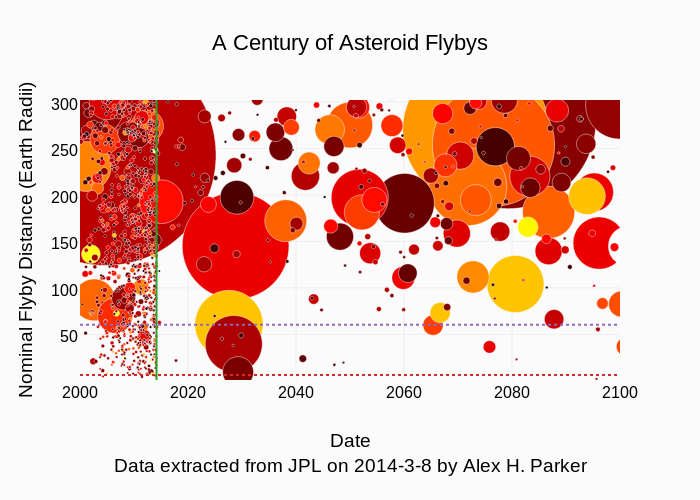

In [46]:
# Import .png figure and show it in this cell
from IPython.display import Image
Image('asteroids.png')

Not bad. The Plotly figure now resides on your computer!

Alternatively, one could have used another `plotly.plotly` function,

    >>> py.image.ishow(alexhp68, 'asteroids') 
    
to display the static `.png` version of the `asteroids` figure object inside this notebook.

Next, extract the data object tucked inside `alexhp68` using the `get_data()` method and make a list of flyby distances by looping through each trace objects (`Scatter` in this case):

In [47]:
# Extract data object inside figure object
alexhp68_data = alexhp68.get_data()

# Make a list of distances:
# distances are linked to the 'y' key in each trace (Scatter) object,
# specify item [0] to extract value from list (of one item)
distances = [trace['y'][0] for trace in alexhp68_data]

Histograms in Plotly are generated using the `Histogram` graph object (we cover histograms in detail in [section 4](https://plotly.com/python/histograms-and-box-plots-tutorial)).

In [48]:
# (*) Import Histogram
from plotly.graph_objs import Histogram

In [49]:
help(Histogram)  # call help()!

Help on class Histogram in module plotly.graph_objs.graph_objs:

class Histogram(PlotlyTrace)
 |  A dictionary-like object for representing a histogram trace in plotly.
 |  
 |  Example:
 |  
 |      >>> py.plot([Histogram(x=[1,1,2,3,2,3,3])]) # bins along x-axis
 |      >>> py.plot([Histogram(y=[1,1,2,3,2,3,3])]) # bins along y-axis
 |  
 |  Online example:
 |  
 |      https://plotly.com/python/histograms/
 |  
 |  Quick method reference:
 |  
 |      Histogram.update(changes)
 |      Histogram.strip_style()
 |      Histogram.get_data()
 |      Histogram.to_graph_objs()
 |      Histogram.validate()
 |      Histogram.to_string()
 |      Histogram.force_clean()
 |  
 |  Valid keys:
 |  
 |      x [required= when 'y' is unset] (value=list or 1d numpy array of
 |      numbers, strings, datetimes) (streamable):
 |          Sets the data sample to be binned (done by Plotly) on the x-axis and
 |          plotted as vertical bars.
 |  
 |      y [required= when 'x' is unset] (value=list or 1

In [50]:
# Make Histogram trace object
trace1 = Histogram(x=distances)

# Make Data object
data = Data([trace1])

# Make layout object (plot title, x-axis title and y-axis title)
layout = Layout(
    title='Histogram of distance data for asteroid flybys', 
    xaxis=XAxis(title='Number of flybys for the given distance'), 
    yaxis=YAxis(title='Normalized flyby distance (Earth radii)'),
    showlegend=False  # remove legend
)

# Make figure object 
fig = Figure(data=data, layout=layout)

# (@) Send to Plotly and show plot in notebook
py.iplot(fig, filename='s0_distance-histogramx')

Nice.

Let's say that you really like the font used in the original asteroid plot. Well now, you can get its name, color, size, etc. from the figure object inside you Python/IPython session:

In [51]:
# Extract global font in 'layout' and 'font' key
asteroids_font = alexhp68['layout']['font']

In [52]:
print(asteroids_font.to_string())  # print Font object

Font(
    family=u'Century Gothic',
    size=16,
    color=u'black'
)


In [53]:
# Update layout with Font object
fig['layout'].update(font=asteroids_font)

# (@) Send to Plotly and show plot in notebook
py.iplot(fig, filename='s0_distance-histogramx-nice-font')

Wow! All that took was three lines of code. Just think of the possibilities that the `get_figure()` function opens up.

##### Python-GUI-Python

Plotly allows user to style their graphs with a GUI. This method is fast and flexible and now, combined with the API `get_figure()` function, styling inside the GUI is reproducible!

For example, starting with a simple Box chart:

In [54]:
# (*) Import the Box graph object
from plotly.graph_objs import Box

In [55]:
help(Box)  # call help()!

Help on class Box in module plotly.graph_objs.graph_objs:

class Box(PlotlyTrace)
 |  A dictionary-like object for representing a box trace in plotly.
 |  
 |  Example:
 |  
 |      >>> py.plot([Box(name='boxy', y=[1,3,9,2,4,2,3,5,2])])
 |  
 |  Online example:
 |  
 |      https://plotly.com/python/box-plots/
 |  
 |  Quick method reference:
 |  
 |      Box.update(changes)
 |      Box.strip_style()
 |      Box.get_data()
 |      Box.to_graph_objs()
 |      Box.validate()
 |      Box.to_string()
 |      Box.force_clean()
 |  
 |  Valid keys:
 |  
 |      y [required=True] (value=list or 1d numpy array of numbers, strings,
 |      datetimes) (streamable):
 |          This array is used to define an individual box plot, or, a
 |          concatenation of multiple box plots. Statistics from these numbers
 |          define the bounds of the box, the length of the whiskers, etc. For
 |          details on defining multiple boxes with locations see 'x'. Each box
 |          spans from the 

In [56]:
# Make list of Box traces
traces = [
    Box(
        y=np.random.randn(40),
        name='box{}'.format(i) 
    ) 
    for i in range(15)]

# Make Data object made up of 15 Box object 
data = Data(traces)

# Make figure object
fig = Figure(data=data)

# (@) Send to Plotly and show plot in notebook
py.iplot(fig, filename='s0_quick-boxes')

Click on the *data and graph* link at the bottom right-hand corner of the plot. This will open up in a unique URL that identifies this figure. 

Since it's public, you or anyone else can view it and choose to *Fork and edit*.

<img src="http://i.imgur.com/K7sVbg4.png">

Change a few style options in a new copy of the figure on the web GUI. Then, find the figure's unique URL which is a combination of your username and the file ID of the plot, which is just a number. Watch the video below for an example:

In [57]:
from IPython.display import YouTubeVideo
YouTubeVideo('zEKfPI3GtOw', width='100%', height='350')

Using the `get_figure()` function, I can pull in the entire figure object just edited!
From that video, the unique user-file_id pair was `'PythonAPI'`, `'61'`, so:

In [58]:
# Get figure object from Plotly's servers 
fig_styled = py.get_figure('PythonAPI', '61')

Then, you can use this new figure object to restyle or replot it within an Python/IPython session ad infinitum:

In [ ]:
# (@) Send to Plotly and show plot in notebook,
#     adjust display width (in pixels)
py.iplot(fig_styled, filename='s0_quickbars-edited', width=700) 

<div style="float:right; \">
    <img src="http://i.imgur.com/4vwuxdJ.png" 
 align=right style="float:right; margin-left: 5px; margin-top: -10px" />
</div>

<h4>Got Questions or Feedback? </h4>

Reach us here at: <a href="https://community.plot.ly" target="_blank">Plotly Community</a>

<h4> What's going on at Plotly? </h4>
Check out our twitter: 
<a href="https://twitter.com/plotlygraphs" target="_blank">@plotlygraphs</a>



In [3]:
from IPython.display import display, HTML

display(HTML('<link href="//fonts.googleapis.com/css?family=Open+Sans:600,400,300,200|Inconsolata|Ubuntu+Mono:400,700" rel="stylesheet" type="text/css" />'))
display(HTML('<link rel="stylesheet" type="text/css" href="http://help.plot.ly/documentation/all_static/css/ipython-notebook-custom.css">'))

! pip install publisher --upgrade
import publisher
publisher.publish(
    's0_getting-started.ipynb', 'python/getting_started//', 'Getting Started Plotly for Python',
    'Getting Started with Plotly for Python',
    title = 'Getting Started Plotly for Python',
    thumbnail='', language='python',
    layout='user-guide', has_thumbnail='false') 

Requirement already up-to-date: publisher in /Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages
